#Importing Dataset

In [ ]:
! pip3 install wget

import wget
wget.download("https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/sentiment140-subset.csv.zip")

!unzip -n sentiment140-subset.csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Archive:  sentiment140-subset.csv.zip


#Loading Dataset

In [ ]:
import pandas as pd
data = pd.read_csv('sentiment140-subset.csv', nrows=50000)

In [ ]:
data.columns

Index(['polarity', 'text'], dtype='object')

In [ ]:
data.head()
#0 indicates negativity and 1 indicates positivity of polarity

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  50000 non-null  int64 
 1   text      50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
import re
import tensorflow as tf
max_features = 4000   #setting maximum length for tockenization

#Fitting the tokenizer onto the text

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)

In [ ]:
X = tokenizer.texts_to_sequences(data['text'].values)

In [ ]:
#Padding the tokenized sequences to maintain the same length across all the input sequences
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [ ]:
X.shape

(50000, 35)

#Creating Model

In [ ]:
embed_dim = 256
lstm_out = 196
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_out, dropout=0.05, recurrent_dropout=0.2)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

#Model Summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 256)           1024000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 35, 256)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 392)              710304    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2)                 786       
                                                                 
Total params: 1,735,090
Trainable params: 1,735,090
Non-trainable params: 0
_________________________________________________________________


#Train Test Splitting

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Doing One Hot Encoding
Y = pd.get_dummies(data['polarity'])

In [ ]:
#mapping 0 and 1 as negative and positive polarity respectively
result_dict = {0: 'Negative', 1: 'Positive'}
y_arr = np.vectorize(result_dict.get)(Y.columns)

In [ ]:
Y = Y.values

In [ ]:
#Split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, Y_train.shape)

(40000, 35) (40000, 2)


#Training Model

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=500, verbose=2)

Epoch 1/20
80/80 - 34s - loss: 0.5673 - accuracy: 0.6967 - 34s/epoch - 424ms/step
Epoch 2/20
80/80 - 20s - loss: 0.4579 - accuracy: 0.7887 - 20s/epoch - 244ms/step
Epoch 3/20
80/80 - 12s - loss: 0.4290 - accuracy: 0.8035 - 12s/epoch - 155ms/step
Epoch 4/20
80/80 - 13s - loss: 0.4106 - accuracy: 0.8132 - 13s/epoch - 158ms/step
Epoch 5/20
80/80 - 13s - loss: 0.3915 - accuracy: 0.8223 - 13s/epoch - 158ms/step
Epoch 6/20
80/80 - 12s - loss: 0.3719 - accuracy: 0.8338 - 12s/epoch - 146ms/step
Epoch 7/20
80/80 - 11s - loss: 0.3538 - accuracy: 0.8424 - 11s/epoch - 137ms/step
Epoch 8/20
80/80 - 11s - loss: 0.3340 - accuracy: 0.8478 - 11s/epoch - 140ms/step
Epoch 9/20
80/80 - 12s - loss: 0.3165 - accuracy: 0.8576 - 12s/epoch - 144ms/step
Epoch 10/20
80/80 - 11s - loss: 0.2962 - accuracy: 0.8679 - 11s/epoch - 142ms/step
Epoch 11/20
80/80 - 11s - loss: 0.2790 - accuracy: 0.8764 - 11s/epoch - 134ms/step
Epoch 12/20
80/80 - 12s - loss: 0.2652 - accuracy: 0.8820 - 12s/epoch - 145ms/step
Epoch 13/20
8

#Evaluate the model on the test set

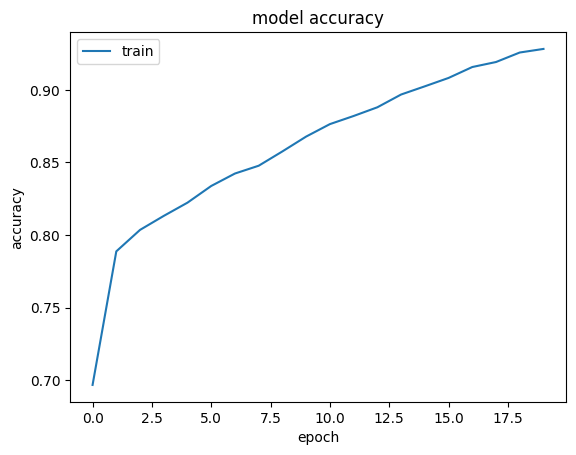

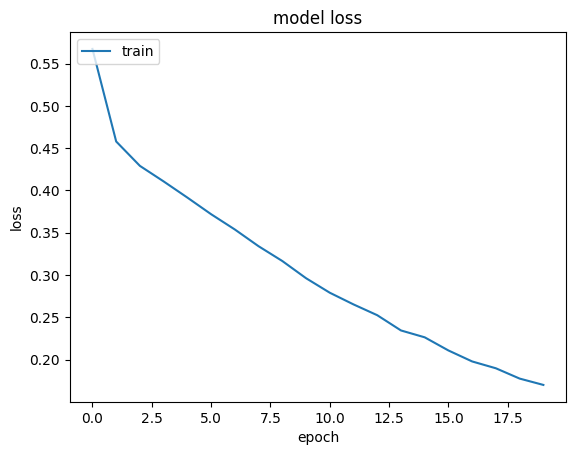

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#Computation of Accuracy

In [ ]:
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

157/157 - 4s - loss: 1.0062 - accuracy: 0.7418 - 4s/epoch - 23ms/step
score: 1.01
acc: 0.74


#Preparing Sentiment for Testing

In [ ]:
#Initilize Text
twt = ['I do not recommend this product']
#Tockenization
twt = tokenizer.texts_to_sequences(twt)
#Pad It
twt = tf.keras.preprocessing.sequence.pad_sequences(twt, maxlen=X.shape[1], dtype='int32', value=0)

#Predicting the sentiment

In [ ]:
sentiment = model.predict(twt, batch_size=1)[0]
print(sentiment)

if(np.argmax(sentiment) == 0):
    print(y_arr[0])
elif (np.argmax(sentiment) == 1):
    print(y_arr[1])

1/1 [==============================] - 0s 434ms/step
[9.9908018e-01 9.1985916e-04]
Negative
